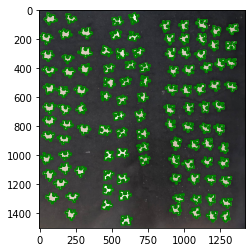

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import sovler

plt.rcParams['figure.figsize'] = [10,10]

img = cv2.imread('cropped_puzzle_pieces.jpg')
pieces = sovler.puzzle_pieces(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for piece in pieces:
    plt.plot(piece[:,0], piece[:,1], 'g')
plt.show()

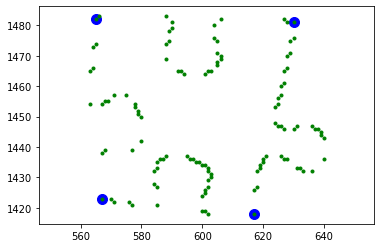

In [2]:
i = 0
piece = pieces[0]
corner_idxs = sovler.find_corners(piece)
corners = piece[np.array(corner_idxs)]
plt.plot(corners[:,0], corners[:,1], 'bo', markersize=10)
plt.plot(piece[:,0], piece[:,1], 'g.')
plt.axis('equal')
plt.show()

### Uncharted territory

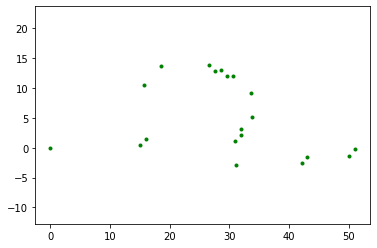

In [4]:
a = corners[0]
b = corners[1]
edge = piece[range(corner_idxs[0], corner_idxs[1])] - a
ab = b - a
abhat = ab / np.linalg.norm(ab)
perp = np.cross(abhat, [0,0,1])[0:2]
basis = np.array([abhat, perp])

t = np.matmul(edge, basis)

plt.plot(t[:,0], t[:,1], 'g.')
plt.axis('equal')
plt.show()